In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NETWORK_SIZE=1000
MAX_ITER=550
import const
from swarm import Swarm

In [3]:
results = {}

# (attackers fractions, use guarded gossip flag)
fracs = [(0.05, True),
         (0.1, True),
         (0.2, True),
         (0.05, False),
         (0.1, False),
         (0.2, False)]

for frac, validate in fracs:
    
    swarm = Swarm(NETWORK_SIZE, attacker_frac=frac, use_guarded_gossip=validate)
    
    # itermediate values (with init point)
    iterations = []
    percentages = []
    
    # report every 50 iterations
    for i in range(MAX_ITER):
        if i % 50 == 0:
            iterations.append(i)
            percentages.append(int(swarm.report() * 100))
        swarm.iteration()
    
    key = f"{frac}" if validate else f"{frac}_no_validation"
    results[key] = (f"{frac}",iterations, percentages, validate)
    
    

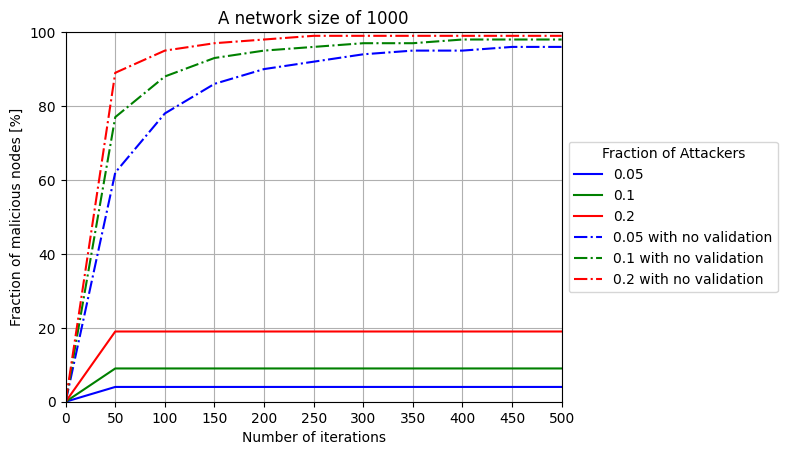

In [11]:
#ploting
fig, ax = plt.subplots()
color_idx=0
colors = {'0.05':'blue', '0.1':'green', '0.2':'red'}
for _, (frac, itr, percent, validate) in results.items():
    
    line_style = '-' if validate else '-.'
    
    line_label = frac if validate else f'{frac} with no validation'
    
    ax.plot(itr, percent, line_style, color=colors[frac], label=line_label)

ax.set(xlabel='Number of iterations', ylabel='Fraction of malicious nodes [%]',
       title=f'A network size of {NETWORK_SIZE}')
ax.grid()
ax.set_xlim([0, 500])
plt.xticks([x for x in range(501) if x % 50 == 0])
ax.set_ylim([0, 100])
# Put a legend to the right of the current axis
legend = ax.legend(loc='center left', title="Fraction of Attackers", bbox_to_anchor=(1, 0.5))
plt.savefig(f"experiment_with_{NETWORK_SIZE}_nodes_result.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()